<a href="https://colab.research.google.com/github/radhakrishnan-omotec/elections-repo/blob/main/Project_1_Exit_Polls_vs_Actual_Polls_Using_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Average of All Exit Polls vs. Actual Polls Using Ensemble Learning**

**Objectives:**To compare the average results of all exit polls with actual poll results. To develop an ensemble learning model to predict actual poll results using various exit polls.


# **1. Data Collection**

**1.1 Exit Polls Data:** Collect exit poll data from multiple sources (news agencies, independent survey agencies, etc.).Ensure that the data includes information on demographics, sample sizes, methodologies used, and polling times. Standardize the format of the collected data for uniformity.


In [1]:
!pip install -q kaggle

!mkdir -p ~/.kaggle

In [2]:
!kaggle datasets download -d rubenmukherjee/india-2024-election-dataset-all-candidates

Dataset URL: https://www.kaggle.com/datasets/rubenmukherjee/india-2024-election-dataset-all-candidates
License(s): CC0-1.0
  0% 0.00/881k [00:00<?, ?B/s]
100% 881k/881k [00:00<00:00, 81.1MB/s]


In [3]:
!unzip india-2024-election-dataset-all-candidates.zip -d ./polls

Archive:  india-2024-election-dataset-all-candidates.zip
  inflating: ./polls/GE India 2024.xlsx  
  inflating: ./polls/eci_data_2024.csv  
  inflating: ./polls/phase_data.xlsx  


In [5]:
!git clone https://github.com/radhakrishnan-omotec/elections-repo.git

Cloning into 'elections-repo'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 471.60 KiB | 2.41 MiB/s, done.
Resolving deltas: 100% (1/1), done.


**1.1 Import necessary Libraries:**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
df = pd.read_csv('/content/polls/eci_data_2024.csv', encoding='latin1')

# **2. Data Preprocessing**

**2.1 Cleaning and Standardization:**
Handle missing values: Impute or remove missing data points.
Standardize data formats: Ensure consistency in date formats, numerical representations, and categorical labels.
Normalize or scale data as required.


In [10]:
# Display the first few rows
print(df.head())

# Display a concise summary of the DataFrame
print(df.info())

# Display basic statistical details
print(df.describe(include='all'))

   S.N           Candidate                                Party EVM Votes  \
0    1     BISHNU PADA RAY               Bharatiya Janata Party    102182   
1    2  KULDEEP RAI SHARMA             Indian National Congress     77829   
2    3          MANOJ PAUL  Andaman Nicobar Democratic Congress      8236   
3    4          D AYYAPPAN   Communist Party of India (Marxist)      6009   
4    5     V.K. ABDUL AZIZ                          Independent      2195   

  Postal Votes Total Votes % of Votes                      State  \
0          254      102436      50.58  Andaman & Nicobar Islands   
1          211       78040      38.54  Andaman & Nicobar Islands   
2           18        8254       4.08  Andaman & Nicobar Islands   
3            8        6017       2.97  Andaman & Nicobar Islands   
4            8        2203       1.09  Andaman & Nicobar Islands   

                    Constituency  
0  Andaman & Nicobar Islands - 1  
1  Andaman & Nicobar Islands - 1  
2  Andaman & Nicobar Is

In [11]:
# Check for missing values
print(df.isnull().sum())
# Optionally, fill or drop missing values
df = df.fillna(0)  # Example: filling missing values with 0

S.N             0
Candidate       0
Party           0
EVM Votes       0
Postal Votes    0
Total Votes     0
% of Votes      0
State           0
Constituency    0
dtype: int64


**2.2 Data Profiling:** Get a summary of the dataset, including mean, median, mode, standard deviation, etc.

In [12]:
# Identify non-numeric values in the 'EVM Votes' column
non_numeric_ev = df[pd.to_numeric(df['EVM Votes'], errors='coerce').isna()]
print(non_numeric_ev)

# Similarly, check for other columns
non_numeric_pv = df[pd.to_numeric(df['Postal Votes'], errors='coerce').isna()]
print(non_numeric_pv)

non_numeric_tv = df[pd.to_numeric(df['Total Votes'], errors='coerce').isna()]
print(non_numeric_tv)

non_numeric_vp = df[pd.to_numeric(df['% of Votes'], errors='coerce').isna()]
print(non_numeric_vp)


      S.N                                       Candidate  \
1737    1  MUKESHKUMAR CHANDRAKAANT DALAL ( Uncontested )   

                       Party EVM Votes Postal Votes Total Votes % of Votes  \
1737  Bharatiya Janata Party         -            -           -          -   

        State Constituency  
1737  Gujarat   Surat - 24  
      S.N                                 Candidate  \
11     12                     ANAND RAMNATH ARLEKAR   
143    13                   VISHNU REDDY LANKIREDDY   
150    20                          ASHOK ANAND GALI   
156    26  VANKAYALAPATI VENKATA SIVA RAMANJANEYULU   
159    29                      SRIKRISHNA AKKISETTI   
...   ...                                       ...   
8769   14                         JALALUDDIN SARKAR   
8781    8                              JOSEPH KISKU   
8785   12                            SUBHASH BARMAN   
8818    6                         SAHABUDDIN MALLIK   
8897    9                           SK. SAPIYAR ALI   

 

In [13]:
# Replace '-' with 0
df['EVM Votes'] = df['EVM Votes'].replace('-', '0')
df['Postal Votes'] = df['Postal Votes'].replace('-', '0')
df['Total Votes'] = df['Total Votes'].replace('-', '0')
df['% of Votes'] = df['% of Votes'].replace('-', '0')

# Alternatively, replace with NaN and then drop or fill NaN values
df['EVM Votes'] = pd.to_numeric(df['EVM Votes'], errors='coerce')
df['Postal Votes'] = pd.to_numeric(df['Postal Votes'], errors='coerce')
df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')
df['% of Votes'] = pd.to_numeric(df['% of Votes'], errors='coerce')

# Fill NaN values with 0
df = df.fillna(0)


In [14]:
df['EVM Votes'] = df['EVM Votes'].astype(int)
df['Postal Votes'] = df['Postal Votes'].astype(int)
df['Total Votes'] = df['Total Votes'].astype(int)
df['% of Votes'] = df['% of Votes'].astype(float)

**2.3: Data Visualization**: Analyze individual columns. For numerical data, use histograms, box plots, and for categorical data, use bar charts.

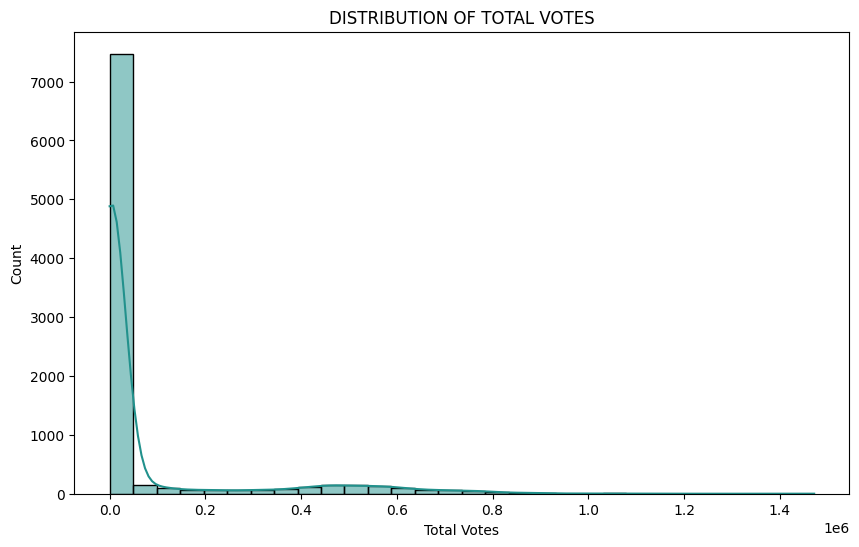

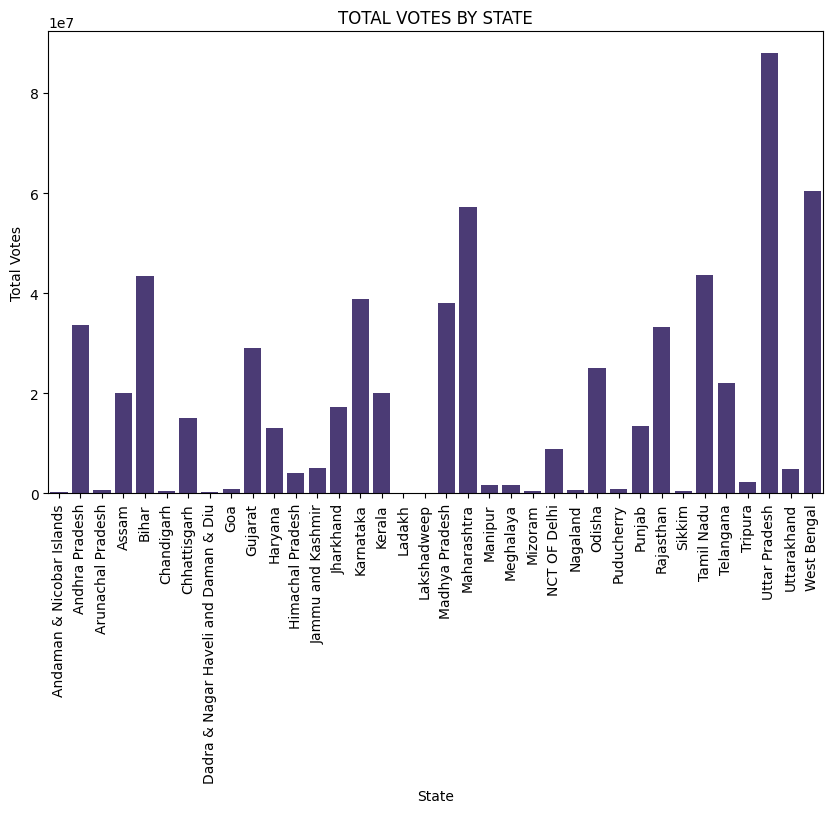

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the 'viridis' palette
sns.set_palette("viridis")

# Distribution of votes
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Votes'], bins=30, kde=True, color=sns.color_palette("viridis", as_cmap=True)(0.5))
plt.title('DISTRIBUTION OF TOTAL VOTES')
plt.show()

# Total votes by state
plt.figure(figsize=(10, 6))
state_votes = df.groupby('State')['Total Votes'].sum().reset_index()
sns.barplot(x='State', y='Total Votes', data=state_votes)
plt.title('TOTAL VOTES BY STATE')
plt.xticks(rotation=90)
plt.show()

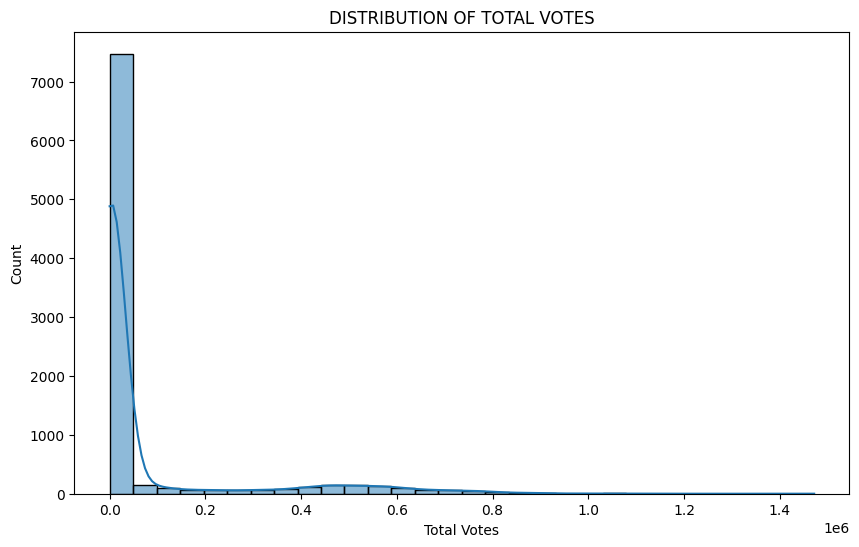

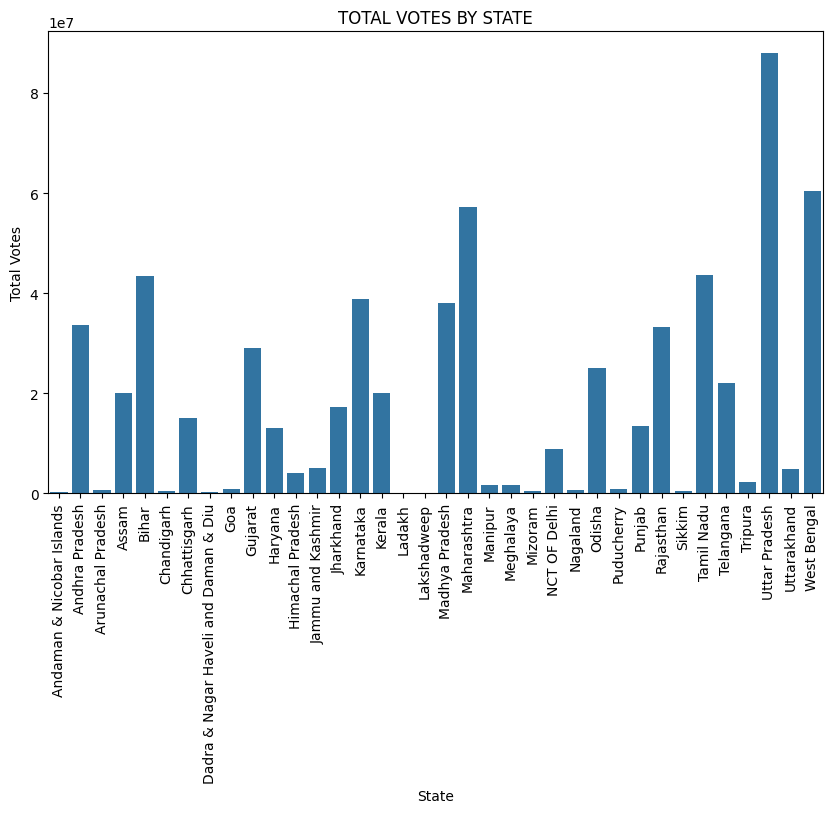

In [16]:
# Distribution of votes
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Votes'], bins=30, kde=True)
plt.title('DISTRIBUTION OF TOTAL VOTES')
plt.show()

# Total votes by state
plt.figure(figsize=(10, 6))
state_votes = df.groupby('State')['Total Votes'].sum().reset_index()
sns.barplot(x='State', y='Total Votes', data=state_votes)
plt.title('TOTAL VOTES BY STATE')
plt.xticks(rotation=90)
plt.show()

# Interactive plot
fig = px.bar(df, x='State', y='Total Votes', color='Party', title='TOTAL VOTES BY STATE AND PARTY')
fig.show()


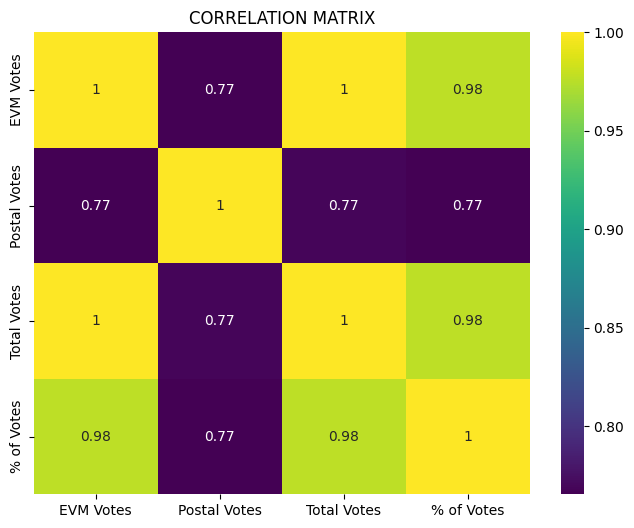

In [18]:
# Compute correlation matrix
corr_matrix = df[['EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('CORRELATION MATRIX')
plt.show()


**2.3 Data Splitting:** Split the data into training and testing sets. Ensure a reasonable split (e.g., 70-30) to train and validate the model.


In [22]:
# Group by party and calculate mean percentage of votes
party_votes = df.groupby('Party')['% of Votes'].mean().reset_index()
print(party_votes)

# Group by state and calculate total votes
state_votes = df.groupby('State')['Total Votes'].sum().reset_index()
print(state_votes)


                                     Party  % of Votes
0                  AARAKSHAN VIRODHI PARTY      0.1000
1                               AJSU Party     12.1000
2                    Aadarsh Mithila Party      0.8600
3                    Aadarsh Sangram Party      0.0700
4                        Aadi Bharat Party      0.0700
..                                     ...         ...
741                  Yuva Krantikari Party      0.7200
742                       Yuva Taram Party      0.0650
743                       Yuva Vikas Party      0.1700
744  Yuvajana Sramika Rythu Congress Party     39.4208
745                Zoram Peoples Movement     42.4500

[746 rows x 2 columns]
                                   State  Total Votes
0              Andaman & Nicobar Islands       202514
1                         Andhra Pradesh     33729342
2                      Arunachal Pradesh       723247
3                                  Assam     20059870
4                                  Bihar     4

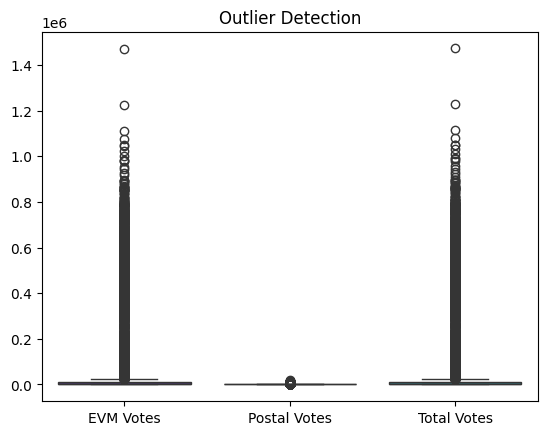

In [24]:
# Example: Outlier detection


sns.boxplot(data=df[['EVM Votes', 'Postal Votes', 'Total Votes']])
plt.title('Outlier Detection')
plt.show()


# **3. Exploratory Data Analysis (EDA)**

**3.1 Descriptive Statistics:** Calculate summary statistics (mean, median, mode, standard deviation) for the exit polls and actual results. Visualize the distribution of votes and demographic information


In [25]:
# Calculate summary statistics for the actual results
actual_results_stats = df[['EVM Votes', 'Postal Votes', 'Total Votes']].describe().T
actual_results_stats['median'] = df[['EVM Votes', 'Postal Votes', 'Total Votes']].median()
actual_results_stats['mode'] = df[['EVM Votes', 'Postal Votes', 'Total Votes']].mode().iloc[0]

print("Actual Results Statistics:")
print(actual_results_stats)

# If you have exit polls data in a column named 'Exit Poll Votes'
if 'Exit Poll Votes' in df.columns:
    exit_polls_stats = df['Exit Poll Votes'].describe()
    exit_polls_stats['median'] = df['Exit Poll Votes'].median()
    exit_polls_stats['mode'] = df['Exit Poll Votes'].mode().iloc[0]

    print("\nExit Polls Statistics:")
    print(exit_polls_stats)
else:
    print("Exit polls data not found in the dataset.")


Actual Results Statistics:
               count          mean            std  min      25%     50%  \
EVM Votes     8902.0  72075.818580  178871.257706  0.0  1085.00  2768.5   
Postal Votes  8902.0    420.636711    1339.607914  0.0     3.00     9.0   
Total Votes   8902.0  72496.455291  179898.773637  0.0  1094.25  2781.0   

                 75%        max  median   mode  
EVM Votes     9677.0  1468549.0  2768.5  674.0  
Postal Votes    49.0    19827.0     9.0    1.0  
Total Votes   9759.5  1471885.0  2781.0  415.0  
Exit polls data not found in the dataset.


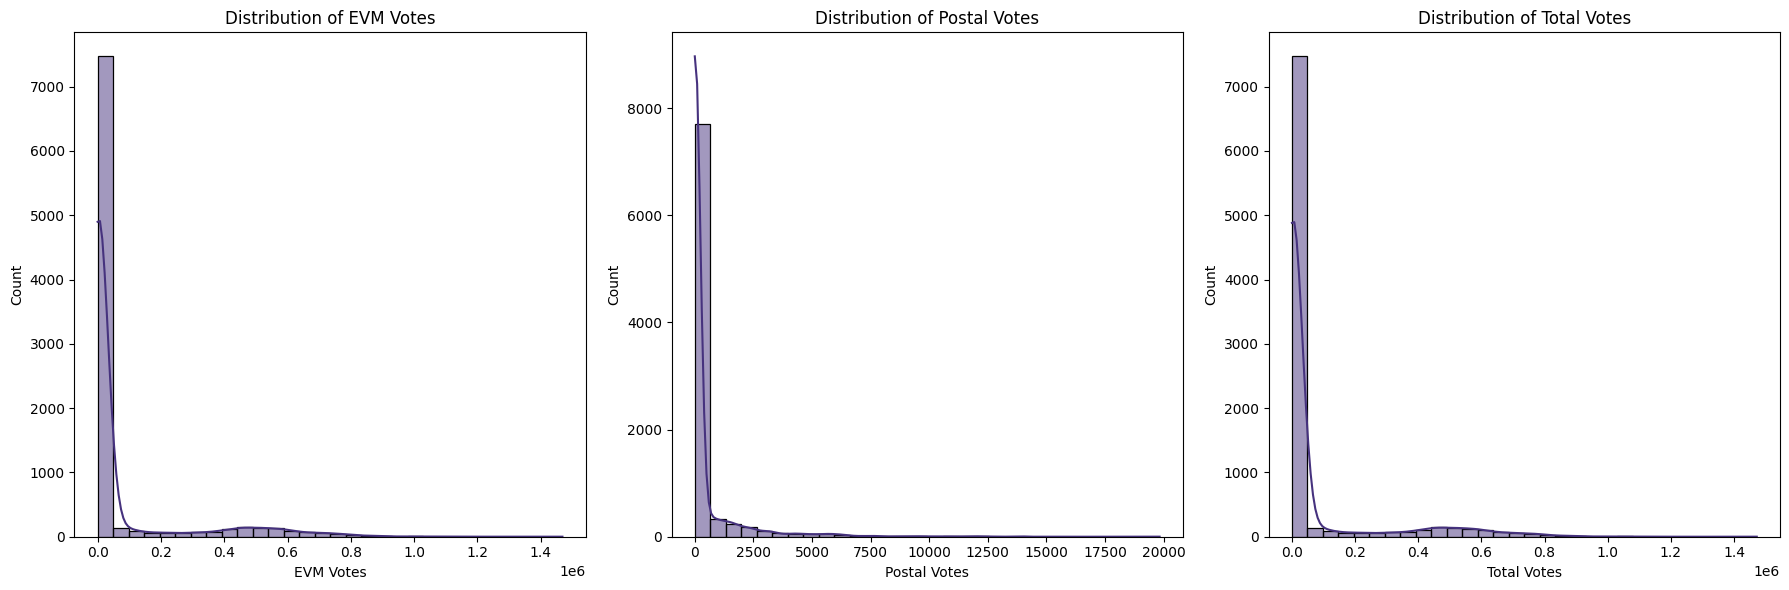

In [26]:
# Visualize the distribution of EVM Votes, Postal Votes, and Total Votes
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['EVM Votes'], bins=30, kde=True)
plt.title('Distribution of EVM Votes')

plt.subplot(1, 3, 2)
sns.histplot(df['Postal Votes'], bins=30, kde=True)
plt.title('Distribution of Postal Votes')

plt.subplot(1, 3, 3)
sns.histplot(df['Total Votes'], bins=30, kde=True)
plt.title('Distribution of Total Votes')

plt.tight_layout()
plt.show()

# Visualize the distribution of Exit Poll Votes if available
if 'Exit Poll Votes' in df.columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(df['Exit Poll Votes'], bins=30, kde=True)
    plt.title('Distribution of Exit Poll Votes')
    plt.show()


**3.2 Comparative Analysis:**
Compare the average of all exit polls with the actual results.
Use visualizations such as bar charts, histograms, and box plots to highlight discrepancies and similarities.


In [27]:
# Calculate average of exit polls if 'Exit Poll Votes' column exists
if 'Exit Poll Votes' in df.columns:
    avg_exit_polls = df['Exit Poll Votes'].mean()
else:
    avg_exit_polls = None

# Calculate average of actual results
avg_actual_results = df['Total Votes'].mean()

print(f"Average of Exit Polls: {avg_exit_polls}")
print(f"Average of Actual Results: {avg_actual_results}")


Average of Exit Polls: None
Average of Actual Results: 72496.45529094586


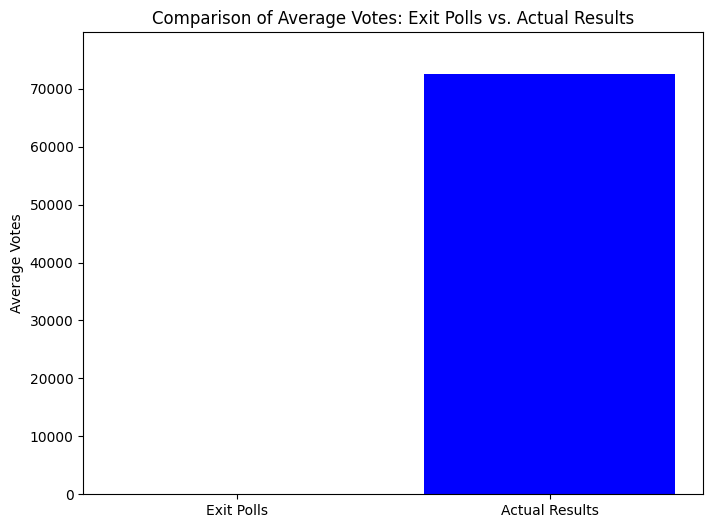

In [28]:
# Check if avg_exit_polls is None and handle appropriately
if avg_exit_polls is None:
    avg_exit_polls = 0  # Set to zero or any default value

# Bar chart for comparison
plt.figure(figsize=(8, 6))
plt.bar(['Exit Polls', 'Actual Results'], [avg_exit_polls, avg_actual_results], color=['orange', 'blue'])
plt.ylabel('Average Votes')
plt.title('Comparison of Average Votes: Exit Polls vs. Actual Results')
plt.ylim(0, avg_actual_results * 1.1)  # Adjust ylim based on actual results
plt.show()

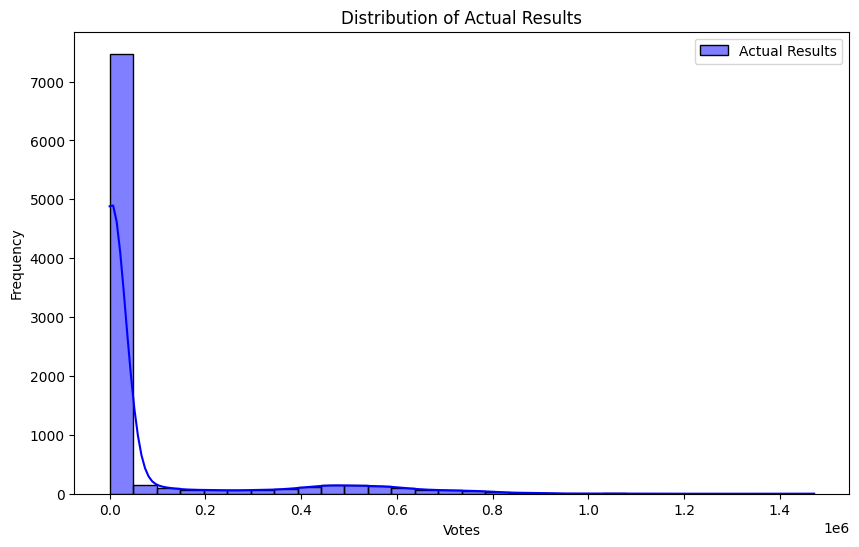

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Votes'], bins=30, kde=True, color='blue', label='Actual Results')
plt.title('Distribution of Actual Results')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

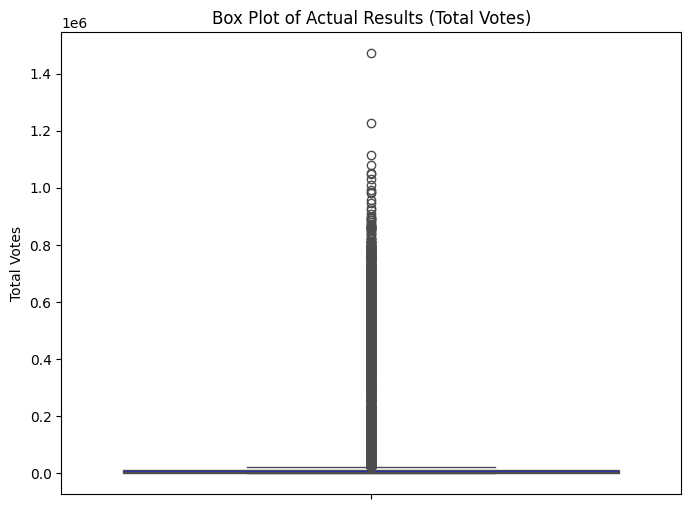

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Total Votes'], color='blue')
plt.title('Box Plot of Actual Results (Total Votes)')
plt.show()

# **4. Ensemble Learning Model Development :** By following these detailed steps, the project will systematically develop and evaluate an
ensemble learning model to predict actual poll results using various exit polls.


## LINEAR REGRESSION

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
df_numeric = df[['EVM Votes', 'Postal Votes', 'Total Votes']].dropna()  # Drop rows with missing values if any

# Separate predictors (X) and target (y)
X = df_numeric[['EVM Votes', 'Postal Votes']]
y = df_numeric['Total Votes']

In [33]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [1. 1.]
Intercept: 0.0


In [35]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.1611182096477088e-28
R-squared: 1.0


## DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier  # For classification tasks
from sklearn.tree import plot_tree

In [37]:
# Assuming df is your DataFrame containing the dataset
# Define features (X) and target variable (y)
X = df[['EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes']]  # Features
y = df['Party']  # Target variable (example, predicting Party based on votes)

# If you're performing regression or another task, adjust y accordingly


In [38]:
# Split data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
# Example: Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance, if applicable
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3155530600786075


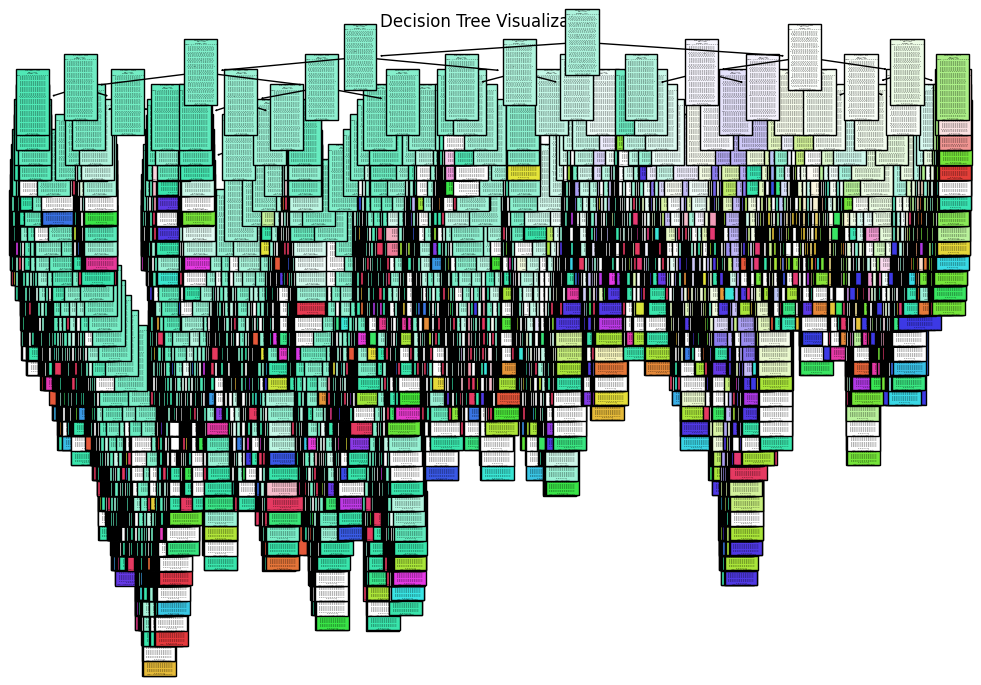

In [42]:

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.title("Decision Tree Visualization")
plt.show()


## SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:

X = df[['EVM Votes', 'Postal Votes', '% of Votes']]  # Features
y = df['Total Votes']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:


# Initialize the SVM model
svm_regressor = SVR(kernel='rbf')

# Train the SVM model
svm_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 37613510645.77819


In [ ]:


# Initialize the SVM model
svm_classifier = SVC(kernel='rbf')

# Train the SVM model
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
         123       0.00      0.00      0.00       1.0
         124       0.00      0.00      0.00       1.0
         133       0.00      0.00      0.00       1.0
         141       0.00      0.00      0.00       2.0
         151       0.00      0.00      0.00       1.0
         154       0.00      0.00      0.00       1.0
         163       0.00      0.00      0.00       1.0
         164       0.00      0.00      0.00       1.0
         171       0.00      0.00      0.00       1.0
         175       0.00      0.00      0.00       1.0
         179       0.00      0.00      0.00       1.0
         180       0.00      0.00      0.00       1.0
         190       0.00      0.00      0.00       1.0
         196       0.00      0.00      0.00       1.0
         202       0.00      0.00      0.00       1.0
         205       0.00      0.00      0.00       1.0
         206 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

In [ ]:


# Initialize the SVM model
svm_classifier = SVC(kernel='rbf')

# Train the SVM model
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
         123       0.00      0.00      0.00       1.0
         124       0.00      0.00      0.00       1.0
         133       0.00      0.00      0.00       1.0
         141       0.00      0.00      0.00       2.0
         151       0.00      0.00      0.00       1.0
         154       0.00      0.00      0.00       1.0
         163       0.00      0.00      0.00       1.0
         164       0.00      0.00      0.00       1.0
         171       0.00      0.00      0.00       1.0
         175       0.00      0.00      0.00       1.0
         179       0.00      0.00      0.00       1.0
         180       0.00      0.00      0.00       1.0
         190       0.00      0.00      0.00       1.0
         196       0.00      0.00      0.00       1.0
         202       0.00      0.00      0.00       1.0
         205       0.00      0.00      0.00       1.0
         206 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

## RANDOM FOREST

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Use RandomForestClassifier for classification tasks
from sklearn.metrics import mean_squared_error  # Use appropriate metrics based on your task
from sklearn.model_selection import GridSearchCV

In [ ]:

# Example: Assuming X contains features and y contains target variable
X = df[['EVM Votes', 'Postal Votes', '% of Votes', 'Candidate', 'Party', 'State', 'Constituency']]
y = df['Total Votes']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1382763.610140423


In [ ]:
# Example of hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Re-train with best parameters if necessary
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
